In [91]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score,mean_absolute_error,mean_squared_error,classification_report
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [92]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [93]:
gender_encoder = LabelEncoder()
damage_encoder = LabelEncoder()
age_encoder = LabelEncoder()

train_data['Gender'] = gender_encoder.fit_transform(train_data['Gender'])
train_data['Vehicle_Age'] = age_encoder.fit_transform(train_data['Vehicle_Age'])
train_data['Vehicle_Damage'] = damage_encoder.fit_transform(train_data['Vehicle_Damage'])

test_data['Gender'] = gender_encoder.fit_transform(test_data['Gender'])
test_data['Vehicle_Age'] = age_encoder.fit_transform(test_data['Vehicle_Age'])
test_data['Vehicle_Damage'] = damage_encoder.fit_transform(test_data['Vehicle_Damage'])

In [94]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [95]:
features = ['Gender', 'Age', 'Driving_License', 
            'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 
            'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
target = 'Response'

X = train_data[features]
y = train_data[target]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 0.19738972556257375
MSE: 0.09375491740314393
RMSE: 0.306194247828309


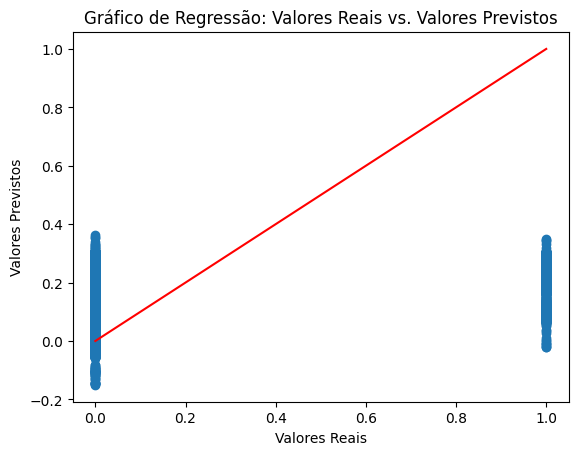

In [98]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Regressão: Valores Reais vs. Valores Previstos')
plt.show()

In [99]:
new_case = {
    'Gender': 'Male',
    'Age': 47,
    'Driving_License': 1,
    'Region_Code': 28.0,
    'Previously_Insured': 0,
    'Vehicle_Age': '> 2 Years',
    'Vehicle_Damage': 'Yes',
    'Annual_Premium': 38294.0,
    'Policy_Sales_Channel': 26.0,
    'Vintage': 27
}
new_case_df = pd.DataFrame([new_case])

new_case_df['Gender'] = gender_encoder.transform(new_case_df['Gender'])
new_case_df['Vehicle_Age'] = age_encoder.transform(new_case_df['Vehicle_Age'])
new_case_df['Vehicle_Damage'] = damage_encoder.transform(new_case_df['Vehicle_Damage'])

In [100]:
prediction = model.predict(new_case_df)
binary_prediction = 1 if prediction > 0.2 else 0

print('Previsão para o novo caso:', binary_prediction)

Previsão para o novo caso: 1
